# HW 5
#### 國立臺灣大學 工業工程所碩士班 一年級 趙上涵 R08546036

# Q1
<img src='./picture_source/HW_5_1.PNG'>

# Answers

<br>

#### (a)~(e) the output is shown as following.
#### The output of applying the AutoMPG dataset is also shown within the following cells

In [1]:
import pandas as pd
import numpy as np

In [24]:
def factor_analyzer(X, factor_number):
    # calculate X mean and center X
    X_mean = np.mean(X.T, axis=1)
    X_center = X - X_mean
    X_covariance = np.cov(X_center.T)
    
    # produce eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(X_covariance)
    eigenvalues_selected = eigenvalues[:factor_number]  # keep selected eigenvalues only
    
    # calculate variance(X) matrix by AT and A without dimension reduction
    eigenvalues_diagonal_total = np.zeros((eigenvalues.shape[0], eigenvalues.shape[0]), float)
    np.fill_diagonal(eigenvalues_diagonal_total, eigenvalues)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal_total)
    A_transpose_full = eigenvectors.dot(eigenvalues_diagonal_total_sqrt)
    A_full = eigenvalues_diagonal_total_sqrt.dot(eigenvectors.T)
    X_variance = A_full.dot(A_transpose_full)
    
    # produce eigenvalues diagonal matrix and eigenvalues diagonal matrix (by given factors needed)
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigenvalues[:factor_number])
    
    # produce A_transpose and A
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_transpose = eigenvectors[:, :factor_number].dot(eigenvalues_diagonal_sqrt)
    A = eigenvalues_diagonal_sqrt.dot(eigenvectors[:, :factor_number].T)
    #     print('A', A.shape)
    #     print('A_transpose', A_transpose.shape)
    
    # calculate Psi and factor
    Psi = X_variance - A_transpose.dot(A)
    #     print('Psi', Psi.shape)
    Psi_inverse = np.linalg.inv(Psi)
    #     print('X', X.shape)
    inner = np.linalg.inv(A.dot(Psi_inverse).dot(A_transpose))
    factor = X.dot(Psi_inverse).dot(A_transpose).dot(inner)
    
    # calculate communality vector
    communality_vector = A_transpose.dot(A)
    
    # print out summary
    print("========================== Output Summary ==========================\n【The loading matrix A】\n", A,
          "\n\n【Factor Matrix】\n", factor,
          "\n\n【Communality Matrix】\n", communality_vector, 
          "\n\n【Uniqueness Vector】\n", Psi, "\n\n")
    
    # calculate contribution of each factor
    print("【Contribution of each factor】")
    explainable_ratio_list = []
    for i, j in enumerate(eigenvalues_selected):
        varianve_total = np.sum(X_variance)
        factor_contribution = np.around((j / varianve_total), decimals=6)
        explainable_ratio_list.append(factor_contribution)
        print('Contribution of factor', (i + 1), 'is', factor_contribution)
    print("\n")
    
    # calculate contribution 
    total_explainable_ratio = 0
    components_needed_list = []
    for i, j in enumerate(explainable_ratio_list):
        total_explainable_ratio += j
        if total_explainable_ratio >= 0.9:
            if len(components_needed_list) < 5:
                components_needed_list.append(i + 1)
                print('90%:', str(i + 1), 'factors needed.')
            break
        elif total_explainable_ratio >= 0.8:
            if len(components_needed_list) < 4:
                components_needed_list.append(i + 1)
                print('80%:', str(i + 1), 'factors needed.')
        elif total_explainable_ratio >= 0.7:
            if len(components_needed_list) < 3:
                components_needed_list.append(i + 1)
                print('70%:', str(i + 1), 'factors needed.')
        elif total_explainable_ratio >= 0.6:
            if len(components_needed_list) < 2:
                components_needed_list.append(i + 1)
                print('60%:', str(i + 1), 'factors needed.')
        elif total_explainable_ratio >= 0.5:
            if len(components_needed_list) < 1:
                components_needed_list.append(i + 1)
                print('50%:', str(i + 1), 'factors needed.')
    return factor

AutoMPG = pd.read_csv('./data/AutoMPG.csv')
factor = factor_analyzer(AutoMPG.iloc[:, 1:], 2)

========================== Output Summary ==========================
【The loading matrix A】
 [[ 1.53387275e+00  9.78370976e+01  3.33424798e+01  8.49389564e+02
  -1.15756458e+00 -1.14387985e+00 -4.71928262e-01]
 [-5.18452823e-01 -3.68000437e+01 -1.16047842e+01  4.69846449e+00
   1.35506622e+00  9.28064081e-01  1.26183723e-01]] 

【Factor Matrix】
             0          1
0    3.846493  50.675730
1    4.070001  50.501911
2    3.768832  50.245890
3    3.764501  50.390514
4    3.783366  50.382139
..        ...        ...
387  2.962437  58.565495
388  2.184973  58.648699
389  2.386503  57.329359
390  2.767639  58.665298
391  2.878228  58.892542

[392 rows x 2 columns] 

【Communality Matrix】
 [[ 2.62155893e+00  1.69148744e+02  5.71596542e+01  1.30041957e+03
  -2.47809467e+00 -2.23572357e+00 -7.89298207e-01]
 [ 1.69148744e+02  1.09263409e+04  3.68918802e+03  8.29289060e+04
  -1.63119255e+02 -1.46066683e+02 -5.08156580e+01]
 [ 5.71596542e+01  3.68918802e+03  1.24639198e+03  2.82662297e+04
  -5.

In [11]:
AutoMPG = pd.read_csv('./data/AutoMPG.csv')
factor = factor_analyzer(AutoMPG.iloc[:, 1:], 2)

========================== Output Summary ==========================
【The loading matrix A】
 [[ 1.53387275e+00  9.78370976e+01  3.33424798e+01  8.49389564e+02
  -1.15756458e+00 -1.14387985e+00 -4.71928262e-01]
 [-5.18452823e-01 -3.68000437e+01 -1.16047842e+01  4.69846449e+00
   1.35506622e+00  9.28064081e-01  1.26183723e-01]] 

【Factor Matrix】
             0          1
0    3.846493  50.675730
1    4.070001  50.501911
2    3.768832  50.245890
3    3.764501  50.390514
4    3.783366  50.382139
..        ...        ...
387  2.962437  58.565495
388  2.184973  58.648699
389  2.386503  57.329359
390  2.767639  58.665298
391  2.878228  58.892542

[392 rows x 2 columns] 

【Communality Matrix】
 [[ 2.62155893e+00  1.69148744e+02  5.71596542e+01  1.30041957e+03
  -2.47809467e+00 -2.23572357e+00 -7.89298207e-01]
 [ 1.69148744e+02  1.09263409e+04  3.68918802e+03  8.29289060e+04
  -1.63119255e+02 -1.46066683e+02 -5.08156580e+01]
 [ 5.71596542e+01  3.68918802e+03  1.24639198e+03  2.82662297e+04
  -5.

In [17]:
for i, j in enumerate(factor.iloc[:, 0].tolist()):
    total = np.sum(factor.iloc[:, 0])
    minimun = np.min(factor.iloc[:, 0])
    factor.loc[i, 'new_value'] = (j - minimun) / total
    
print(factor)

            0          1  new_value
0    3.846493  50.675730   0.001769
1    4.070001  50.501911   0.001947
2    3.768832  50.245890   0.001707
3    3.764501  50.390514   0.001704
4    3.783366  50.382139   0.001719
..        ...        ...        ...
387  2.962437  58.565495   0.001065
388  2.184973  58.648699   0.000447
389  2.386503  57.329359   0.000607
390  2.767639  58.665298   0.000910
391  2.878228  58.892542   0.000998

[392 rows x 3 columns]


# Q2
<img src='./picture_source/HW_5_2.PNG'>

# Answers

<br>

#### (a)
#### 50%: 2 factors needed.
#### 60%: 3 factors needed.
#### 70%: 6 factors needed.
#### 80%: 15 factors needed.
#### 90%: 47 factors needed.
#### (b) Show within the output below.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
ORL_data = pd.read_csv('./data/ORL_data.csv')
X = ORL_data.iloc[:, :-1].to_numpy().T
factor = factor_analyzer(X, 50)

factor_project = factor[:, 0]
# print(pc1_X_project[0])
min_factor = np.min(factor_project)
max_factor = np.max(factor_project)
range_factor = np.max(factor_project) - np.min(factor_project)

for i, j in enumerate(factor_project):
    factor_project[i] = 255 * ((max_factor - j) / range_factor)

========================== Output Summary ==========================
【The loading matrix A】
 [[-33.33132125 -54.69451495 -40.15370201 ... -34.16769648 -37.54649825
  -34.50983104]
 [ 23.19952523  12.50835188  23.95763304 ...  13.7996866   16.1367681
   20.46489429]
 [ -5.3071061   -8.25520749  -5.50605229 ...  -6.84184937  -8.3208007
   -6.62674593]
 ...
 [  0.59761481   1.02061896   0.56091515 ...   1.99679498   1.98869681
    0.22606167]
 [ -0.10440191   1.65672446   1.67040932 ...  -1.17255222  -2.17124801
   -2.8225606 ]
 [ -1.53490858   2.01903524  -1.90527828 ...   2.23339106   0.30948555
    2.63130044]] 

【Factor Matrix】
 [[-2.60791938  0.94946331 -2.03736159 ...  0.45074721  1.43027145
  -0.44336002]
 [-2.61196995  0.96785705 -2.01332048 ...  0.53010192  1.5391576
  -0.26550811]
 [-2.61635429  0.95123638 -2.00188546 ...  0.69617202  1.71662756
  -0.24137027]
 ...
 [-2.1530306   0.32478103  0.71410609 ...  1.77963447  0.02419709
   1.10582267]
 [-2.07917689  0.07241292  0.67863

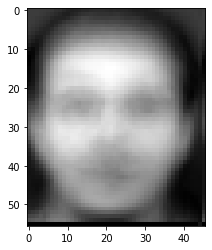

In [18]:
pixel_list_number = []
pixel_list_x = []
pixel_list_y = []

for i, j in enumerate(factor_project.tolist()):
    value = (i+1)
    row = value / 46
    column = value % 46 - 1
    pixel_list_number.append(value)
    pixel_list_x.append(row)
    pixel_list_y.append(column)
    

sample = np.zeros(shape=(56, 46))
for i, j in enumerate(pixel_list_x):
    x_value = int(j - 1)
    y_value = int(pixel_list_y[i] - 1)
    sample[x_value, y_value] = factor_project[i]

imgplot = plt.imshow(sample, cmap='gray', vmin=0, vmax=255)
plt.show()